# Latihan SKLearn K-means
1. Konversi data menjadi Dataframe.
2. Lakukan preprocessing data.
3. Hilangkan kolom 'CustomerID' dan 'gender'.
4. Latih model K-Means.
5. Buat plot untuk Elbow dan Cluster.

 ## Konversi data menjadi Dataframe

In [1]:
import pandas as pd

# ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Lakukan preprocessing data.
lakukan sedikit preporcessing -> mengubah kolom agar lebih seragam, mengubah kolom berisi data kategork menjadi numerik

In [3]:
# ubah nama kolom
df = df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score'})

# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data yang sudah di prepocessing
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


menghilangkan kolom customer id dan gender karena kurang relevan untuk proces clustering

In [4]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
x = df.drop(['CustomerID', 'gender'], axis=1)

# membuat list yang berisi inertia
clusters = []

for i in range(1,11):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

Membuat plot inertia dari setiap nilai K

Text(0.5, 0, 'Inertia')

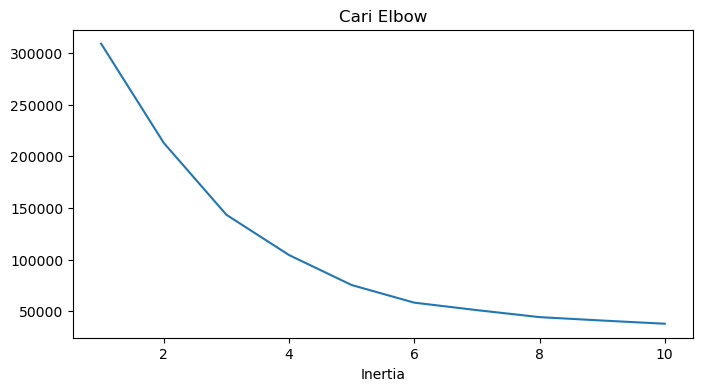

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_xlabel('Inertia')

melatih kembali kmeans dengan jumlah k yang didapat dari metode Elbow kemudian membuat plot hasil pengklasteran k-means

/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


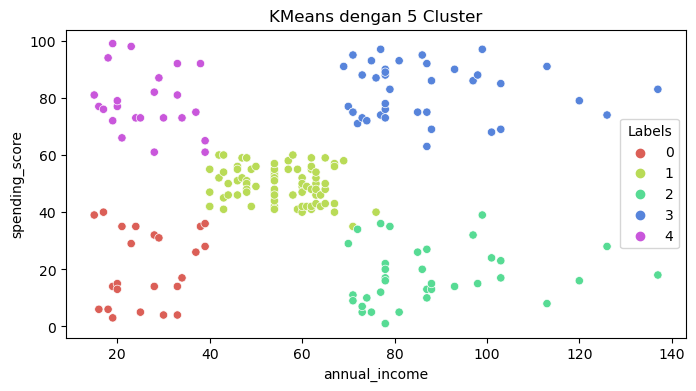

In [11]:
# membuat objek kmeans
km = KMeans(n_clusters=5).fit(x)

# menambahkan kolom label pada dataset
x['Labels'] = km.labels_

# membuat plot kmeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'],  hue=x['Labels'], palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 Cluster')
plt.show()